<div class="alert alert-info">
    <img src="img/download.png" style="width:75px;height:75px;" align="left">
    <img src="img/logo.png" style="width:75px;height:75px;" align="right">
    <h1 align="center">Deep Learning with Pytorch</h1> 
    <h3 align="center"> lecture 4(Summer 2021)</h3>
    <h5 align="center">Fateme Hafezian zade [DL2021](https://fatemehafezi.gnomio.com)</h5>
    
</div>

<h2>Table of Contents</h2>


<ul>
    <li><a href="BGD">Regression with torch module with batch gradient decent</a></li>
    <li><a href="SGD">Regression with torch module with stochastic gradient decent</a></li>
   
    
</ul>


<hr>


<img src="img/1.png" style="width:350px;height:300px;">
<hr>

<hr>
<img src="img/images.png" style="width:350px;height:300px;">


<div class="alert alert-success">
    <h1 align="center">compare BGD/SGD/MBGD at a glance</h1>
    <img src="./img/BMS.png" style="width:500px;height:300px;" align="center">            
    
    
    
</div>    

<h1>Linear Regression 1D: Training Two Parameter Batch Gradient Descent </h1> 


In [3]:
# These are the libraries we are going to use in the lab.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import time

In [4]:
# class for ploting  

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
    # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.LOSS.append(loss)
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram    
    def plot_ps(self,iteraction):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n) )
        plt.xlabel('w')
        plt.ylabel('b')
        
        plt.savefig(f'./img/BGD{iteraction}.png')
        plt.show()

In [5]:
# Import libraries and set random seed

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(1)

In [6]:
# Create Data Class

class Data1D(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = 1 * self.x - 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        
    # Getter
    def __getitem__(self,index):    
        return self.x[index],self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [7]:
# Create dataset object

dataset = Data1D()

In [8]:
# Create a linear regression model class

from torch import nn, optim

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [9]:
# Build in cost function

model = linear_regression(1,1)


optimizer = optim.SGD(model.parameters(), lr = 0.01)


criterion = nn.MSELoss()


# Create Dataloader object

trainloader = DataLoader(dataset = dataset, batch_size = 5)



In [10]:
# Create plot surface object
get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go = False)

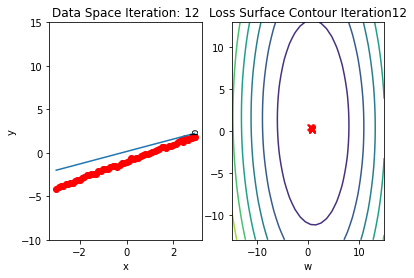

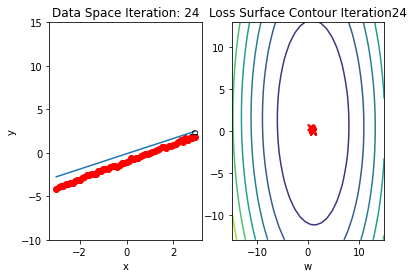

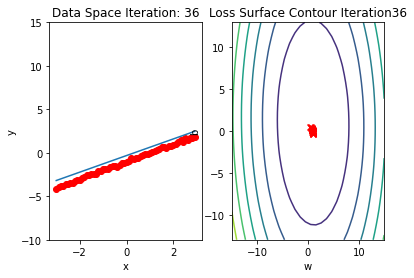

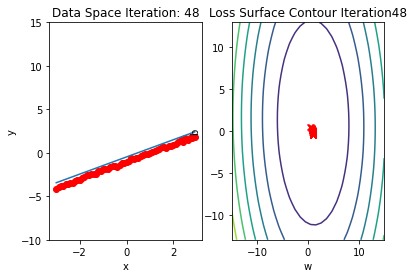

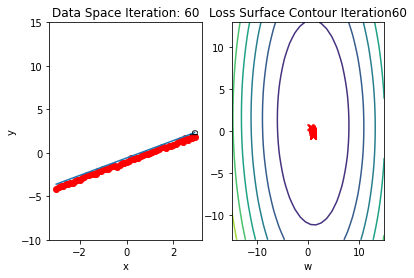

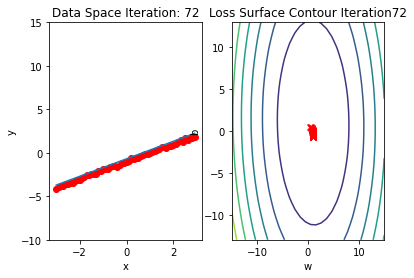

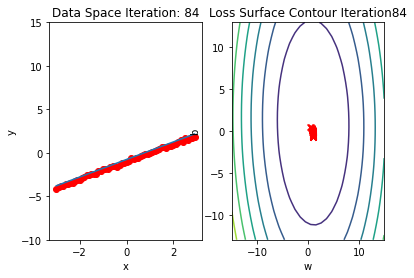

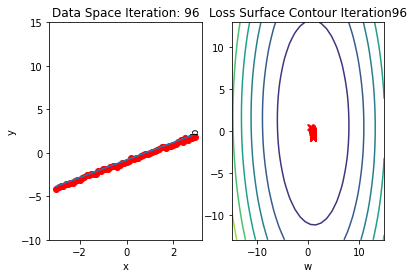

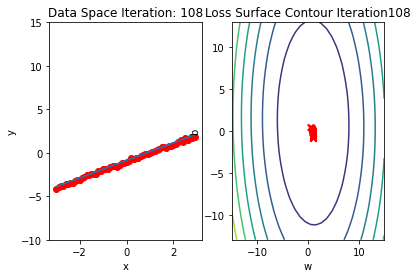

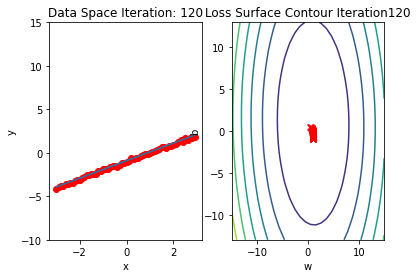

5.161983489990234


In [11]:
# Train Model

def train_model_BGD(iter):
    for epoch in range(iter):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(model, loss.tolist())          
            optimizer.zero_grad()
            loss.backward()

            optimizer.step()
        get_surface.plot_ps(epoch)
        
        

start=time.time()
train_model_BGD(10)
End=time.time()
Time=float(End-start)
print(Time)

<h2 id=" #Makeup_Data" > Make Some Data </h2>


In [12]:
# The function for plotting 2D

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0],'ro', label='y') # Scatter plot
    
    ax.plot_surface(X, Y, yhat) # Plane plot
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

In [13]:
# Create a 2D dataset

class Data2D(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b    
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):          
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [14]:
# Create the dataset object

data_set = Data2D()

<h2 id="Cust">Build Custom Modules (input: 2D, output: 1D) </h2>

In [15]:
# Create the linear regression model and print the parameters

model = linear_regression(2,1)


optimizer = optim.SGD(model.parameters(), lr=0.1)


criterion = nn.MSELoss()


# Create the data loader

train_loader = DataLoader(dataset=data_set, batch_size=2)

<h2 id="BGD">Train the Model via Mini-Batch Gradient Descent</h2>


Before Training: 


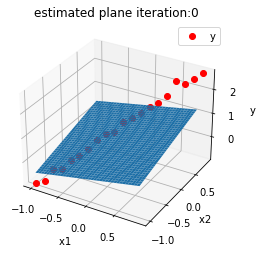

After Training: 


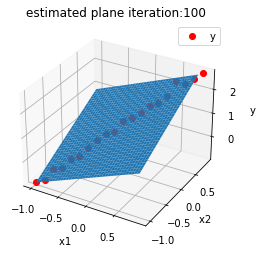

In [16]:
# Train the model

LOSS = []
print("Before Training: ")
Plot_2D_Plane(model, data_set)   
epochs = 100
   
def train_model(epochs):    
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()     
train_model(epochs)
print("After Training: ")
Plot_2D_Plane(model, data_set, epochs)  

<h2 id="Cust">Build Custom Modules (input: 2D, output: 2D) </h2>

In [17]:
class Data_2D_2D(Dataset):
    def __init__(self):
            self.x=torch.zeros(20,2)
            self.x[:,0]=torch.arange(-1,1,0.1)
            self.x[:,1]=torch.arange(-1,1,0.1)
            self.w=torch.tensor([ [1.0,-1.0],[1.0,3.0]])
            self.b=torch.tensor([[1.0,-1.0]])
            self.f=torch.mm(self.x,self.w)+self.b
            
            self.y=self.f+0.001*torch.randn((self.x.shape[0],1))
            self.len=self.x.shape[0]

    def __getitem__(self,index):

        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

In [18]:
data_set2=Data_2D_2D()

In [19]:
model=linear_regression(2,2)
optimizer = optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.MSELoss()
train_loader=DataLoader(dataset=data_set2,batch_size=5)

In [20]:
# Train the model


LOSS=[]
epochs = 100
   
def train_model(epochs):    
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()     
train_model(epochs)
  

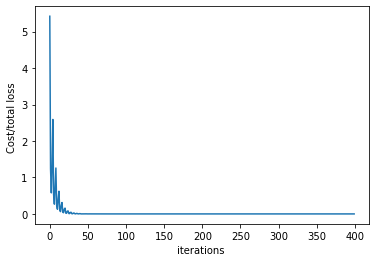

In [21]:
#LOSS.append(loss.item())
plt.plot(LOSS)
plt.xlabel("iterations ")
plt.ylabel("Cost/total loss ")
plt.show()

# Classification

### sigmoid function

In [22]:
z = torch.arange(-100, 100, 0.1).view(-1, 1)

In [23]:
z1=torch.tensor([2.33,1.15,-3.3])
yhat = torch.sigmoid(z1)
#plt.plot(z.numpy(), yhat.numpy())

Text(0, 0.5, 'yhat')

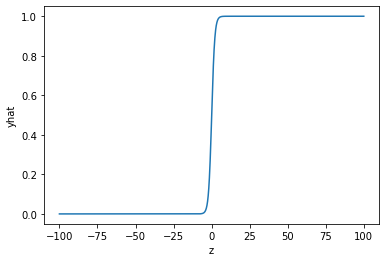

In [24]:
sig = nn.Sigmoid()
yhat = sig(z)


plt.plot(z.numpy(), yhat.numpy())
plt.xlabel('z')
plt.ylabel('yhat')

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.1.1_logistic_regression_block_diagram.png" width = 800, align = "center" alt="logistic regression block diagram" />


In [25]:
# Create class for plotting and the function for plotting

class plot_error_surfaces2(object):
    
    # Construstor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                yhat= 1 / (1 + np.exp(-1*(w2*self.x+b2)))
                Z[count1,count2]=-1*np.mean(self.y*np.log(yhat+1e-16) +(1-self.y)*np.log(1-yhat+1e-16))
                #Z[count1, count2] = np.mean((self.y - (1 / (1 + np.exp(-1*w2 * self.x - b2)))) ** 2)
                count2 += 1   
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize=(7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
     # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label="estimated line")
        plt.plot(self.x, 1 / (1 + np.exp(-1 * (self.W[-1] * self.x + self.B[-1]))), label='sigmoid')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-0.1, 2))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.show()
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title('Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        
# Plot the diagram

def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    if leg == True:
        plt.legend()
    else:
        pass

In [26]:
# Create the data class

class Data3(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0] > 0.2] = 1
        self.len = self.x.shape[0]
    
    # Getter
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len

In [27]:
# Create Data object

data_set_classification = Data3()

In [28]:
# Create logistic_regression class

class logistic_regression(nn.Module):
    
    # Constructor
    def __init__(self, n_inputs):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
        
    # Prediction
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

The parameters:  OrderedDict([('linear.weight', tensor([[-5.]])), ('linear.bias', tensor([-10.]))])


<Figure size 432x288 with 0 Axes>

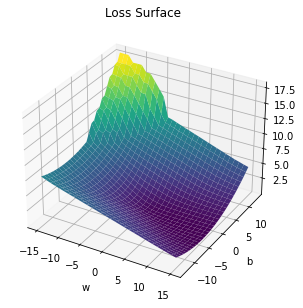

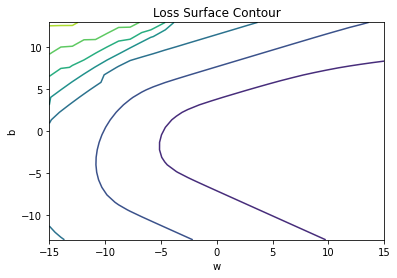

In [29]:
model = logistic_regression(1)


# Set the weight and bias

model.state_dict() ['linear.weight'].data[0] = torch.tensor([[-5]])
model.state_dict() ['linear.bias'].data[0] = torch.tensor([[-10]])
print("The parameters: ", model.state_dict())

def criterion(yhat,y):
    out = -1 * torch.mean(y * torch.log(yhat) + (1 - y) * torch.log(1 - yhat))
    return out

criterion_rm=nn.MSELoss()
trainloader = DataLoader(dataset = data_set_classification, batch_size = 3)

optimizer = torch.optim.SGD(model.parameters(), lr = 2)

get_surface = plot_error_surfaces2(15, 13, data_set_classification[:][0], data_set_classification[:][1], 30)

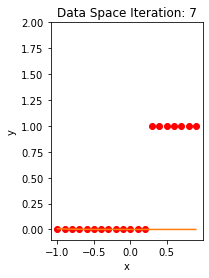

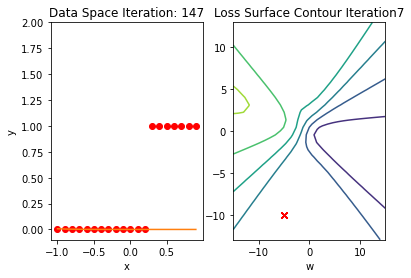

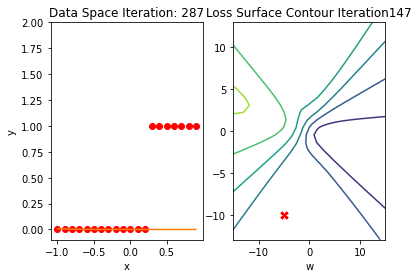

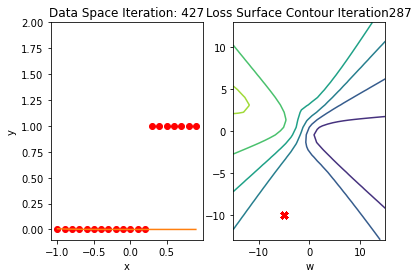

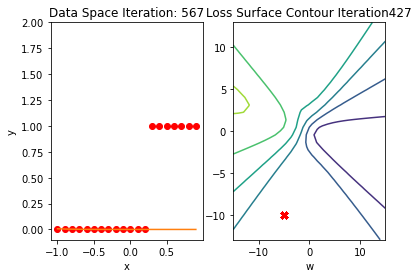

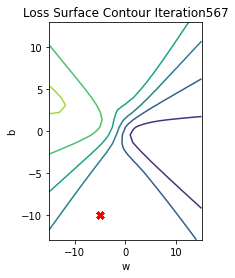

In [25]:
# Train the Model

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion_rm(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            get_surface.set_para_loss(model, loss.tolist())
        if epoch % 20 == 0:
            get_surface.plot_ps()
            
train_model(100)

# Results:

<h3 align="center"> Loss function: MSE ....................................................... Loss function: Negative Log likelihood (Cross-Entropy)</h3>




<img src="img/liklihood_logistic.png" style="width:450px;height:300px;" align="right">


<img src="img/MSE_logistic.png" style="width:450px;height:300px;" align="left">





<img src="img/loss_liklyhood.png" style="width:450px;height:300px;" align="right">

<img src="img/loss_MSE.png" style="width:450px;height:300px;" align="left">
